# Vanilla Signal

In this notebook, we will be constructing an initial signal without controlling for sector or any other clustering that may occur with these companies.

In [161]:
import numpy as np
import pandas as pd
import pickle
import os

# Used to find business days
import datetime
from pandas.tseries.offsets import BDay
import matplotlib.pyplot as plt

In [2]:
os.listdir('../1-data')

['stopwords',
 '.DS_Store',
 'returns.h5',
 '1-Returns_Data_Exploration.ipynb',
 'Text_Tokenizer.ipynb',
 '3-Text_Embedding.ipynb',
 '.ipynb_checkpoints',
 'sample_tokenized',
 'alltokens.pickle',
 'company_filings.pickle',
 '2-Text_Tokenizer.ipynb']

In [3]:
with open('../1-data/company_filings.pickle', 'rb') as handle:
    company_filings = pickle.load(handle)

In [4]:
company_filings[list(company_filings.keys())[0]]

,year,file,Cosine_Similarity
500,2006,000782.SZ.txt,NaN
862,2007,000782.SZ.txt,NaN
1239,2008,000782.SZ.txt,NaN
1363,2009,000782.SZ.txt,NaN
1637,2010,000782.SZ.txt,0.996726
1817,2011,000782.SZ.txt,0.989403
1916,2012,000782.SZ.txt,0.964440
1378,2013,000782.SZ.txt,0.991539
2048,2014,000782.SZ.txt,0.976864
2200,2015,000782.SZ.txt,0.993328


There seems to be reports that contain cid instead of a chinese character. This is something I will need to fix. 

## Finding Next Business Day After Each Filing

For starters, we will be taking a naive approach of assuming each document is filed on the business day after April 30. Businesses are asked to report any time between Feb 1 and April 30 each year. 

In [5]:
cosine_similarity = pd.DataFrame()

for key in list(company_filings.keys()):
    
    # Select company dictionary value
    sample = company_filings[key]
    
    # Create a DataFrame containing only the cosine scores, index is year
    sample_df = sample.loc[:,['year', 'Cosine_Similarity']].set_index('year')
    
    # Rename column to company ticker
    sample_df.columns = [key[:-4]]
    
    cosine_similarity = pd.concat([cosine_similarity,sample_df], axis=1)

In [6]:
cosine_similarity

,000782.SZ,002723.SZ,002025.SZ,002227.SZ,603778.SH,002813.SZ,600385.SH,002685.SZ,600560.SH,002352.SZ,...,600408.SH,300210.SZ,300530.SZ,002799.SZ,300339.SZ,300280.SZ,000637.SZ,000876.SZ,002213.SZ,002521.SZ
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.980038,NaN,0.968123,NaN
2009,NaN,NaN,NaN,0.991257,NaN,NaN,0.992253,NaN,0.993208,NaN,...,0.974460,NaN,NaN,NaN,NaN,NaN,0.986314,0.991674,0.980689,NaN
2010,0.996726,NaN,0.994487,0.992241,NaN,NaN,0.985127,NaN,0.984205,0.980128,...,0.984934,NaN,NaN,NaN,NaN,NaN,0.995721,0.995408,0.993079,NaN
2011,0.989403,NaN,0.973755,0.989706,NaN,NaN,0.976313,NaN,0.990302,0.988313,...,0.986567,NaN,NaN,NaN,NaN,NaN,0.986827,0.956920,0.995573,0.980849
2012,0.964440,NaN,0.970347,0.969242,NaN,NaN,0.990270,NaN,0.986087,0.960063,...,0.985301,0.959825,NaN,NaN,NaN,0.957184,0.968652,0.963851,0.942300,0.943026
2013,0.991539,NaN,0.986257,0.989110,NaN,NaN,NaN,0.976804,NaN,0.984484,...,NaN,0.994983,NaN,NaN,0.990634,0.997375,0.995117,0.991162,0.993062,0.977609
2014,0.976864,0.979147,0.975534,0.990196,NaN,NaN,0.970710,0.985088,0.948658,0.975158,...,0.956528,0.984976,NaN,NaN,0.978396,0.987504,0.988837,0.959072,0.985283,0.985175


In [7]:
# Rearrange to numerical order
cosine_similarity = cosine_similarity.loc[:, sorted(cosine_similarity.columns)]
cosine_similarity

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,603986.SH,603987.SH,603988.SH,603989.SH,603990.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,0.979097,0.963648,NaN,0.965768,NaN,NaN,0.965090,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,0.993695,0.989635,NaN,NaN,0.834884,NaN,NaN,0.981457,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.995412,0.978715,NaN,0.983210,0.985631,NaN,0.982124,0.980832,0.978361,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,0.990485,0.989937,0.975736,0.990197,0.991685,0.993550,0.974104,0.980742,0.991779,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,0.983076,0.990228,0.964521,0.989575,0.996554,0.992779,0.977176,0.995140,0.989862,0.984326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,0.991812,0.996491,0.979537,0.982205,0.977356,0.969526,0.948592,0.972817,0.956411,0.963898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.971637,0.983837,0.988565,0.995151,0.993817,0.979255,0.991283,0.990976,0.980396,0.984529,...,NaN,NaN,NaN,NaN,NaN,0.992681,NaN,NaN,NaN,NaN
2014,0.993993,0.983200,0.986775,NaN,0.989643,0.987519,0.983337,0.968777,0.982850,0.981958,...,NaN,NaN,NaN,NaN,NaN,0.993243,NaN,NaN,NaN,NaN


In [8]:
# Check that we can accurately print the next business day after April 30
datetime.datetime(2006,4,1) + BDay(1)

Timestamp('2006-04-03 00:00:00')

In [9]:
# Do this for each year
dates = [datetime.datetime(year,4,1) + BDay(1) for year in cosine_similarity.index]

In [10]:
cosine_similarity.index = dates

In [152]:
cosine_similarity

,1,2,4,5,6,7,8,9,10,11,...,603986,603987,603988,603989,603990,603993,603996,603997,603998,603999
2006-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-02,NaN,0.979097,0.963648,NaN,0.965768,NaN,NaN,0.965090,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-02,0.993695,0.989635,NaN,NaN,0.834884,NaN,NaN,0.981457,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-02,0.995412,0.978715,NaN,0.983210,0.985631,NaN,0.982124,0.980832,0.978361,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,0.990485,0.989937,0.975736,0.990197,0.991685,0.993550,0.974104,0.980742,0.991779,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-04,0.983076,0.990228,0.964521,0.989575,0.996554,0.992779,0.977176,0.995140,0.989862,0.984326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-02,0.991812,0.996491,0.979537,0.982205,0.977356,0.969526,0.948592,0.972817,0.956411,0.963898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-02,0.971637,0.983837,0.988565,0.995151,0.993817,0.979255,0.991283,0.990976,0.980396,0.984529,...,NaN,NaN,NaN,NaN,NaN,0.992681,NaN,NaN,NaN,NaN
2014-04-02,0.993993,0.983200,0.986775,NaN,0.989643,0.987519,0.983337,0.968777,0.982850,0.981958,...,NaN,NaN,NaN,NaN,NaN,0.993243,NaN,NaN,NaN,NaN
2015-04-02,0.995194,1.000000,0.992610,0.987176,0.994848,0.983091,0.926790,0.983294,0.982755,0.997901,...,NaN,NaN,0.964072,NaN,NaN,0.995900,NaN,0.969318,0.950069,NaN


In [154]:
cosine_similarity.mean(axis=1)

2006-04-03         NaN
2007-04-02    0.906066
2008-04-02    0.947604
2009-04-02    0.970199
2010-04-02    0.977626
2011-04-04    0.978721
2012-04-02    0.964383
2013-04-02    0.984582
2014-04-02    0.971022
2015-04-02    0.985711
2016-04-04    0.981628
dtype: float64

# Compare to Ranked Returns

In [12]:
os.listdir('../1-data')

['stopwords',
 '.DS_Store',
 'returns.h5',
 '1-Returns_Data_Exploration.ipynb',
 'Text_Tokenizer.ipynb',
 '3-Text_Embedding.ipynb',
 '.ipynb_checkpoints',
 'sample_tokenized',
 'alltokens.pickle',
 'company_filings.pickle',
 '2-Text_Tokenizer.ipynb']

In [13]:
rets = pd.read_hdf('../1-data/returns.h5')
rets = rets.loc[sorted(rets.index), sorted(rets.columns)]
rets.tail()

,1,2,3,4,5,6,7,8,9,10,...,688687,688689,688696,688698,688699,688777,688788,688819,688981,689009
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-31,0.208489,-0.019874,NaN,-0.009295,-0.143813,-0.123103,-0.616605,-0.011690,-0.075155,-0.036966,...,NaN,NaN,NaN,-0.197052,0.262607,-0.157695,-0.098645,NaN,-0.015298,0.182772
2021-02-28,-0.073937,0.191231,NaN,-0.069474,0.000130,0.061866,0.538079,-0.052296,0.407160,-0.034821,...,NaN,-0.385799,NaN,0.023028,-0.174541,0.005288,0.043775,-0.191033,-0.018028,-0.300866
2021-03-31,0.014547,-0.106790,NaN,-0.106508,0.114453,0.027526,-0.060612,-0.039654,-0.116301,0.125511,...,-0.175449,-0.063534,NaN,0.113968,0.311768,-0.096686,-0.212421,0.056774,-0.029500,-0.064260
2021-04-30,0.071806,-0.048886,NaN,-0.055851,-0.070054,0.014784,-0.021124,-0.009215,0.227617,0.037606,...,0.395890,0.105098,0.528113,0.030599,0.723749,0.144491,0.028248,-0.087067,0.019613,0.132209
2021-05-31,0.065501,-0.035660,NaN,0.024458,-0.198622,-0.007106,0.006551,0.026517,-0.010614,-0.018904,...,0.078027,0.113556,0.070541,0.031092,0.513863,0.100890,0.451633,0.046390,0.047018,0.002390


Let's compare the dimensions of the two DataFrames

In [14]:
np.shape(rets)

(365, 4423)

In [15]:
np.shape(cosine_similarity)

(11, 3154)

It appears as though there are no ids that overlap between Shenzhen and Shanghai. Before we make any changes to the data, let's verify this claim:

In [20]:
# Check if there are any id's that are shared between the two exchanges
len(set([x[:-3] for x in cosine_similarity.columns])) != len(cosine_similarity.columns)

False

In this case, let's convert the cosine_similarity columns to integers so that it matches the returns dataset:

In [69]:
cosine_similarity.columns = [int(x[:-3]) for x in cosine_similarity.columns]
cosine_similarity.head()

,1,2,4,5,6,7,8,9,10,11,...,603986,603987,603988,603989,603990,603993,603996,603997,603998,603999
2006-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-02,NaN,0.979097,0.963648,NaN,0.965768,NaN,NaN,0.965090,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-02,0.993695,0.989635,NaN,NaN,0.834884,NaN,NaN,0.981457,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-02,0.995412,0.978715,NaN,0.983210,0.985631,NaN,0.982124,0.980832,0.978361,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,0.990485,0.989937,0.975736,0.990197,0.991685,0.99355,0.974104,0.980742,0.991779,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculate Rolling Returns Over Horizons

To get a good idea of how well the strategy works, we can calculate the correlation between cosine similarity and the returns of the stocks over a given horizon. Let's first define our rolling returns:

In [130]:
yearly_cumulative_rets = {}

for year in list(range(2006,2017)):
    print(year)
    
    # Initialize a daterange that we will calculate cumulative
    # return 
    daterange = [str(year)+'-05-01',str(year+1)+'-05-01']
    
    # Slice according to date range
    temp = rets[daterange[0]:daterange[1]]
    
    # Calculate cumulative returns for that year over 1-12 month horizon
    temp = (1+temp).cumprod() - 1
    
    # Assign to dictionary
    yearly_cumulative_rets[year] = temp.copy()

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [131]:
temp = rets[daterange[0]:daterange[1]]
temp

,1,2,3,4,5,6,7,8,9,10,...,688687,688689,688696,688698,688699,688777,688788,688819,688981,689009
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-31,-0.020113,0.000000,NaN,0.000000,-0.044380,-0.086346,0.000000,0.058673,-0.079973,-0.147171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-30,-0.003611,0.000000,NaN,0.000000,0.076352,0.007228,0.000000,-0.065374,0.060231,0.003664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-31,0.054307,-0.287585,NaN,0.000000,-0.053239,0.005125,-0.282038,-0.081727,0.001080,-0.020818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-31,0.025401,0.445862,NaN,0.000000,0.042659,0.137223,0.268780,-0.063417,0.109747,0.078090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-30,-0.042397,0.051783,NaN,-0.010950,-0.022068,0.138683,0.087828,0.027393,-0.081254,0.010356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-31,-0.004051,-0.059914,NaN,0.051547,-0.008718,0.005637,0.048132,-0.000533,-0.012759,-0.085540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,0.025165,0.063421,NaN,0.038353,-0.009767,-0.041731,-0.030328,0.007257,-0.031022,-0.020296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,-0.054057,-0.243870,NaN,0.056736,-0.095581,-0.022791,-0.001827,-0.080303,0.004354,-0.017501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-31,0.036964,0.017800,NaN,-0.137493,-0.018522,-0.072079,-0.064796,-0.054795,-0.071580,-0.064881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# Group all the cumulative returns over x-month horizon together
rets_horizon_dict = {}

# Each horizon 
for i in range(12):
    
    temp = pd.concat([yearly_cumulative_rets[year].iloc[i,:] for year in yearly_cumulative_rets.keys()]
                     ,axis=1).T
    
    # Save as +1 to indicate horizon we are calculating over i.e. 1-Month
    rets_horizon_dict[i+1] = temp.copy()  

In [134]:
# Sanity check
rets_horizon_dict[12]

,1,2,3,4,5,6,7,8,9,10,...,688687,688689,688696,688698,688699,688777,688788,688819,688981,689009
2007-04-30,2.419671,2.094197,NaN,2.663807,4.312202,2.025204,3.113102,1.548049,2.535207,5.796061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-30,0.385017,1.249566,NaN,-0.087947,-0.190034,0.514177,0.328205,-0.020617,0.479484,-0.354058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-30,-0.263079,-0.425591,NaN,-0.101654,-0.365061,-0.263410,-0.392894,-0.153035,-0.086271,0.194138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,0.259564,-0.076237,NaN,0.631185,0.364412,-0.023543,0.701564,0.827289,0.206158,0.517324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-30,-0.070205,0.152822,NaN,0.272397,-0.153571,0.303780,0.169181,0.046092,0.643781,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-30,-0.058185,0.109993,NaN,-0.296471,0.064584,0.108824,0.299798,-0.261497,-0.340493,-0.116392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,0.148223,0.257065,NaN,0.255420,-0.336450,-0.084654,0.423044,0.582095,-0.099611,1.023263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-30,-0.027974,-0.265337,NaN,0.281554,-0.113658,0.195267,-0.246716,0.368560,0.181162,-0.067566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,1.223529,0.965329,NaN,0.895508,0.801922,1.507079,1.201266,3.197117,1.696131,0.353521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-30,-0.400893,0.632748,NaN,0.368942,0.649711,-0.352472,-0.148897,0.141474,-0.420424,0.141119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Compute Correlations

In [135]:
np.shape(cosine_similarity)

(11, 3154)

In [136]:
np.shape(rets_horizon_dict[1])

(11, 4423)

In [155]:
temp = rets_horizon_dict[1].loc[:,cosine_similarity.columns].copy()
temp

,1,2,4,5,6,7,8,9,10,11,...,603986,603987,603988,603989,603990,603993,603996,603997,603998,603999
2006-05-31,0.113505,-0.042008,0.460881,0.405219,0.120465,0.318852,0.328496,0.087067,0.248178,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-31,0.115602,0.632215,0.174079,0.161077,0.342522,0.222737,0.080845,0.264246,-0.050642,0.207888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-31,-0.141712,-0.183395,-0.039625,-0.159421,-0.147277,0.197794,-0.114770,-0.325609,0.185303,0.146464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-31,0.091953,0.147341,0.069706,0.155442,0.158784,0.015462,0.024150,0.031635,-0.046677,0.005697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,-0.148558,-0.067058,-0.131490,-0.089997,-0.127975,-0.144994,0.118568,-0.120755,0.000000,-0.141518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-31,-0.027501,-0.061676,-0.019326,0.000000,-0.090635,-0.142349,-0.076306,-0.069475,0.000000,0.142484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-31,-0.061031,0.020832,0.090951,-0.118803,-0.044861,0.354155,0.149782,0.019554,0.054381,-0.058760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,0.129943,0.110190,0.112934,0.060665,0.143940,0.055758,0.281479,0.316177,0.000000,0.182391,...,NaN,NaN,NaN,NaN,NaN,0.066434,NaN,NaN,NaN,NaN
2014-05-31,0.030392,0.140520,-0.024852,-0.019299,-0.030676,-0.049023,-0.058870,0.013150,-0.049049,0.006904,...,NaN,NaN,NaN,NaN,NaN,0.165887,NaN,NaN,NaN,NaN
2015-05-31,-0.083519,-0.018071,0.333494,2.857906,0.334329,0.105141,0.000000,-0.097386,1.358763,0.229162,...,NaN,NaN,0.364683,NaN,NaN,-0.079023,NaN,1.323947,0.672540,NaN


In [156]:
temp.index = cosine_similarity.index

In [157]:
temp.rank(axis=1).corrwith(cosine_similarity.rank(axis=1),axis=1).mean()

0.015170044614143693

In [140]:
# Calculate correlation over each horizon
risk_factor_graph = []
for horizon in list(range(1,13)):
    
    # Slice only the companies that have an associated score
    temp = rets_horizon_dict[horizon].loc[:,cosine_similarity.columns].copy()
    
    # Reindex for easier correlation calculation
    temp.index = cosine_similarity.index
    
    # Calculate correlation
    val  = temp.rank(axis=1).corrwith(cosine_similarity.rank(axis=1),axis=1).mean()
    
    risk_factor_graph.append([horizon, val])

In [159]:
risk_factor_df1 = pd.DataFrame(risk_factor_graph,columns=['Horizon (Months)', 'Corr(Score, Returns)'])
risk_factor_df1

,Horizon (Months),"Corr(Score, Returns)"
0,1,0.015170
1,2,0.001901
2,3,-0.007054
3,4,-0.011099
4,5,-0.009908
5,6,-0.016092
6,7,-0.012607
7,8,-0.021254
8,9,-0.018944
9,10,-0.015597


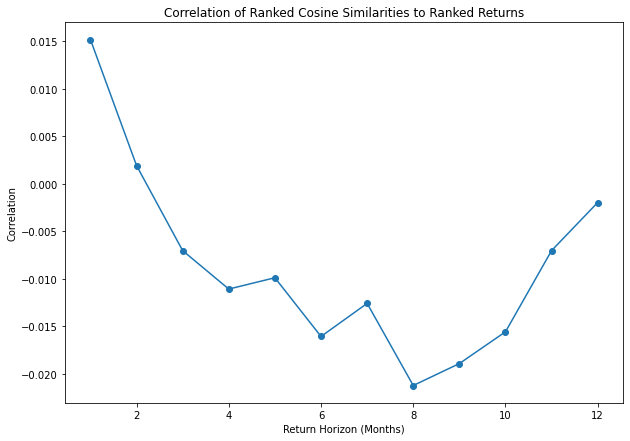

In [166]:
plt.figure(figsize=(10,7))
plt.plot(risk_factor_df1.iloc[:,0],risk_factor_df1.iloc[:,1], "-o")
plt.title('Correlation of Ranked Cosine Similarities to Ranked Returns')
plt.xlabel('Return Horizon (Months)')
plt.ylabel('Correlation')
plt.show()

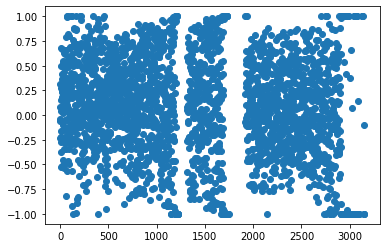

In [174]:
plt.scatter(list(range(3154)),temp.rank(axis=1).corrwith(cosine_similarity.rank(axis=1)))

In [177]:
cosine_similarity.min(axis=1)

2006-04-03         NaN
2007-04-02    0.000000
2008-04-02    0.000000
2009-04-02    0.000827
2010-04-02    0.000000
2011-04-04    0.000000
2012-04-02    0.000000
2013-04-02    0.000000
2014-04-02    0.000000
2015-04-02    0.179909
2016-04-04    0.000585
dtype: float64